<a href="https://colab.research.google.com/github/yodhasu/Code-Archive/blob/machine-learning/Gold_Price_Prediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

data source : https://www.kaggle.com/datasets/amartyanambiar/gold-silver-prices-1791-2020/data

In [234]:
df = pd.read_csv('goldsilver_1791-2021.csv', parse_dates=True)

df

,Year,Gold Price,Silver Price,Gold/Silver Price Ratio
0,1791,19.39,1.28,15.05
1,1792,19.39,1.27,15.17
2,1793,19.39,1.29,15.00
3,1794,19.39,1.26,15.37
4,1795,19.39,1.24,15.55
...,...,...,...,...
225,2016,1252.00,17.16,72.96
226,2017,1260.00,17.08,73.76
227,2018,1270.00,15.72,80.77
228,2019,1390.00,16.17,85.92


# EDA and Preprocessing

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

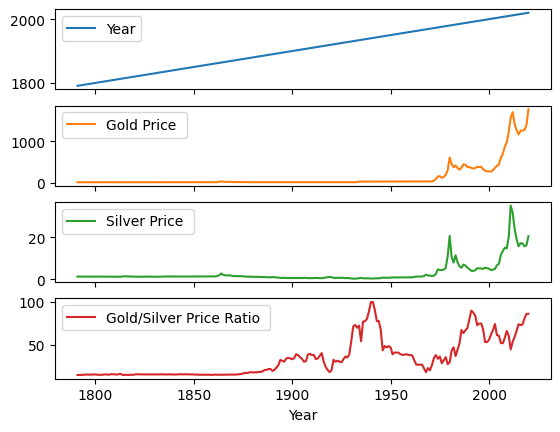

In [235]:
df.set_index(df['Year']).plot(subplots=True)

The gold price doesn't really change in earlier years until around 1960 to 1980 so earlier data can be removed

In [236]:
df = df[(df['Year'] >= 1970)]

In [237]:
df['Year'] = pd.to_datetime(df['Year'], format= '%Y')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 179 to 229
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      51 non-null     datetime64[ns]
 1   Gold Price                51 non-null     float64       
 2   Silver Price              51 non-null     float64       
 3   Gold/Silver Price Ratio   51 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB


In [239]:
df

,Year,Gold Price,Silver Price,Gold/Silver Price Ratio
179,1970-01-01,36.41,1.77,20.54
180,1971-01-01,41.25,1.54,26.66
181,1972-01-01,58.60,1.68,34.75
182,1973-01-01,97.81,2.55,38.21
183,1974-01-01,159.74,4.71,33.90
184,1975-01-01,161.49,4.42,36.51
185,1976-01-01,125.32,4.35,28.76
186,1977-01-01,148.31,4.62,32.05
187,1978-01-01,193.55,5.40,35.80
188,1979-01-01,307.50,11.10,27.69


## Change the index to Year

In [240]:
datedf = df.set_index(df['Year'])
datedf

,Year,Gold Price,Silver Price,Gold/Silver Price Ratio
Year,,,,
1970-01-01,1970-01-01,36.41,1.77,20.54
1971-01-01,1971-01-01,41.25,1.54,26.66
1972-01-01,1972-01-01,58.60,1.68,34.75
1973-01-01,1973-01-01,97.81,2.55,38.21
1974-01-01,1974-01-01,159.74,4.71,33.90
1975-01-01,1975-01-01,161.49,4.42,36.51
1976-01-01,1976-01-01,125.32,4.35,28.76
1977-01-01,1977-01-01,148.31,4.62,32.05
1978-01-01,1978-01-01,193.55,5.40,35.80


In [241]:
datedf = datedf.drop('Year', axis = 1)
datedf

,Gold Price,Silver Price,Gold/Silver Price Ratio
Year,,,
1970-01-01,36.41,1.77,20.54
1971-01-01,41.25,1.54,26.66
1972-01-01,58.60,1.68,34.75
1973-01-01,97.81,2.55,38.21
1974-01-01,159.74,4.71,33.90
1975-01-01,161.49,4.42,36.51
1976-01-01,125.32,4.35,28.76
1977-01-01,148.31,4.62,32.05
1978-01-01,193.55,5.40,35.80


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>], dtype=object)

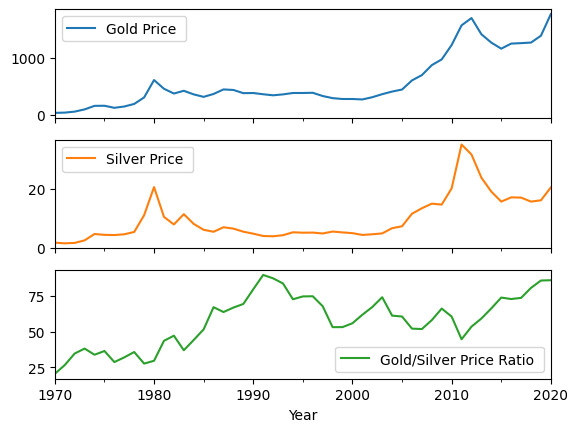

In [242]:
datedf.plot(subplots = True)

## ACF and PACF plotting and Augmented Dickey-Fuller (ADF) test

In [243]:
datedf.describe()

,Gold Price,Silver Price,Gold/Silver Price Ratio
count,51.000000,51.000000,51.000000
mean,579.727647,9.805686,57.684510
std,472.218995,7.567020,18.434659
min,36.410000,1.540000,20.540000
25%,301.370000,4.765000,43.955000
50%,384.930000,6.140000,60.640000
75%,786.500000,14.865000,72.875000
max,1770.000000,35.120000,89.830000


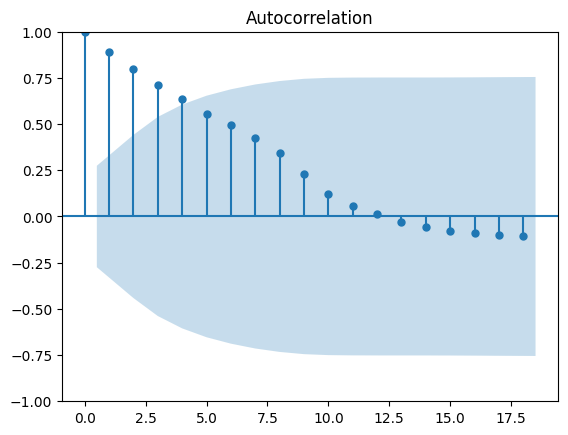

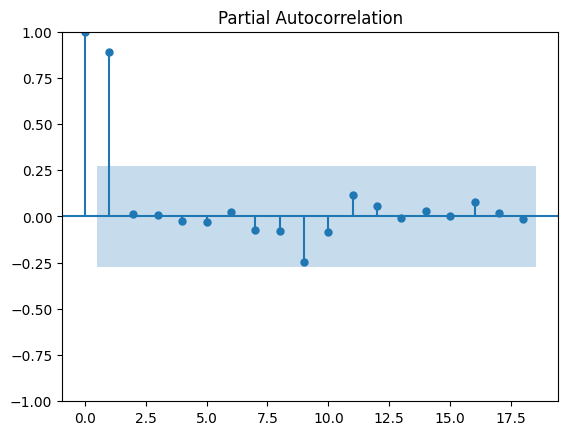

In [244]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(datedf['Gold Price '])

pacf = plot_pacf(datedf['Gold Price '])

Cell [285]

Check wether the data is stationary/non stationary

Stationary: the data doesn't have trends, the statistical property doesn't vary in time

Non stationary: the data  have trends, the statistical property changes overtime

In [245]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(datedf['Gold Price '], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.3246606216058289
n_lags: 0.9784480383748606
p-value: 0.9784480383748606
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

# Training

pmdarima is used to determine the p, d, and q value for ARIMA model. You could manually count it but I'm just lazy af.

In [246]:
!pip install pmdarima

In [247]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA as arima

automodel = pm.auto_arima(datedf['Gold Price '], trace=True, suppress_warnings=True, start_p=0, start_q=0, max_order=4, test = 'adf', seasonal=True)
fitted = automodel

fitted.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=613.586, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=614.831, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=613.371, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=607.040, Time=0.36 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=607.276, Time=0.86 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=612.673, Time=0.16 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 3.281 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -300.520
Date:                Tue, 14 May 2024   AIC                            607.040
Time:                        06:42:26   BIC                            612.716
Sample:                    01-01-1970   HQIC                           609.193
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4519      0.145      3.109      0.002       0.167       0.737
ma.L1         -0.9832      0.161     -6.112      0.000      -1.298      -0.668
sigma2      1.188e+04   2188.049      5.429      0.000    7590.581    1.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                31.51
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.61
Prob(H) (two-sided):                  0.18   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [319]:
# import numpy as np

# dftrain, dftest = np.split(datedf, [int(0.8*len(datedf))])

X = datedf.values
size = int(len(X) * 0.8)
dftrain, dftest = X[0:size], X[size:len(X)]

history = [x for x in dftrain]

In [320]:
datedf.tail()

,Gold Price,Silver Price,Gold/Silver Price Ratio
Year,,,
2016-01-01,1252.0,17.16,72.96
2017-01-01,1260.0,17.08,73.76
2018-01-01,1270.0,15.72,80.77
2019-01-01,1390.0,16.17,85.92
2020-01-01,1770.0,20.54,86.14


In [321]:
forecast_range=pd.date_range(start='1970', periods=40, freq= 'YS')

In [322]:
test_range=pd.date_range(start='2010', periods=11, freq= 'YS')

In [323]:
print(len(history))
print(len(dftrain))

40
40


In [324]:
history_df = pd.DataFrame(history)
dftrain_df = pd.DataFrame(dftrain)
dftest_df = pd.DataFrame(dftest)
history_df.columns = datedf.columns
history_df.index = forecast_range

dftrain_df.columns = datedf.columns
dftrain_df.index = history_df.index

dftest_df.columns = datedf.columns
dftest_df.index = test_range
dftest_df

,Gold Price,Silver Price,Gold/Silver Price Ratio
2010-01-01,1227.0,20.23,60.64
2011-01-01,1572.0,35.12,44.75
2012-01-01,1700.0,31.72,53.58
2013-01-01,1415.0,23.85,59.31
2014-01-01,1269.0,19.11,66.38
2015-01-01,1163.0,15.72,73.98
2016-01-01,1252.0,17.16,72.96
2017-01-01,1260.0,17.08,73.76
2018-01-01,1270.0,15.72,80.77
2019-01-01,1390.0,16.17,85.92


In [325]:
# dftrain.tail()

In [326]:
model = arima(history_df['Gold Price '], order=(1, 2, 1))

fits = model.fit()

## Forecast/Prediction

Cell [298]

Make a forecast for dftest (using n_periods) into the future

In [327]:
forecast= fits.predict(start = len(dftrain), end = len(dftrain) + len(dftest) - 1, typ='levels')

In [328]:
print(len(dftest))
print(len(dftrain))

11
40


In [329]:
# forecast_df = pd.DataFrame(forecast[0],index = dftest.index,columns=['Prediction'])
forecast_df = pd.DataFrame(forecast)
forecast_df

,predicted_mean
2010-01-01,1045.199068
2011-01-01,1110.508173
2012-01-01,1175.040947
2013-01-01,1239.450471
2014-01-01,1303.840427
2015-01-01,1368.227276
2016-01-01,1432.613633
2017-01-01,1496.999911
2018-01-01,1561.386177
2019-01-01,1625.772440


In [330]:
forecast_df.index = dftest_df.index
newdftest_df = dftest_df.drop(columns=['Silver Price ', 'Gold/Silver Price Ratio '])
# forecast_df.columns = newdftest_df.columns

In [331]:
forecast_df

,predicted_mean
2010-01-01,1045.199068
2011-01-01,1110.508173
2012-01-01,1175.040947
2013-01-01,1239.450471
2014-01-01,1303.840427
2015-01-01,1368.227276
2016-01-01,1432.613633
2017-01-01,1496.999911
2018-01-01,1561.386177
2019-01-01,1625.772440


In [332]:
dftest

array([[1227.  ,   20.23,   60.64],
       [1572.  ,   35.12,   44.75],
       [1700.  ,   31.72,   53.58],
       [1415.  ,   23.85,   59.31],
       [1269.  ,   19.11,   66.38],
       [1163.  ,   15.72,   73.98],
       [1252.  ,   17.16,   72.96],
       [1260.  ,   17.08,   73.76],
       [1270.  ,   15.72,   80.77],
       [1390.  ,   16.17,   85.92],
       [1770.  ,   20.54,   86.14]])

In [333]:
len(forecast)

11

In [334]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(dftest_df['Gold Price '], forecast_df)
mae = mean_absolute_error(dftest_df['Gold Price '], forecast_df)
sqrtmse = sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", sqrtmse)

Mean Squared Error:  75583.40381058869
Mean Absolute Error:  237.1347728159235
Root Mean Squared Error:  274.9243601621884


Plotting forecast to current test data

<Axes: >

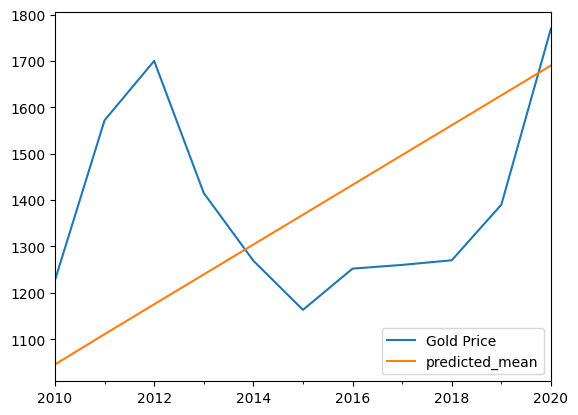

In [335]:
pd.concat([dftest_df['Gold Price '],forecast_df],axis=1).plot()

## Forecasting using all data to predict future outcomes

In [346]:
fitss = arima(datedf['Gold Price '], order=(1, 2, 1))
fitsss = fitss.fit()
fitsss

In [344]:
newdatedf = datedf.drop(columns=['Silver Price ', 'Gold/Silver Price Ratio '])

In [347]:
forecast1 = fitsss.predict(start = len(newdatedf), end = len(newdatedf)+50, typ='levels')

In [349]:
forecast_range1=pd.date_range(start='2021', periods=51, freq= 'YS')
forecast1_df = pd.DataFrame(forecast1)
forecast1_df.index = forecast_range1

In [350]:
forecast1_df

,predicted_mean
2021-01-01,1965.732909
2022-01-01,2078.203834
2023-01-01,2153.052426
2024-01-01,2210.901183
2025-01-01,2261.068481
2026-01-01,2307.764876
2027-01-01,2352.892925
2028-01-01,2397.312309
2029-01-01,2441.411481
2030-01-01,2485.365962


<Axes: >

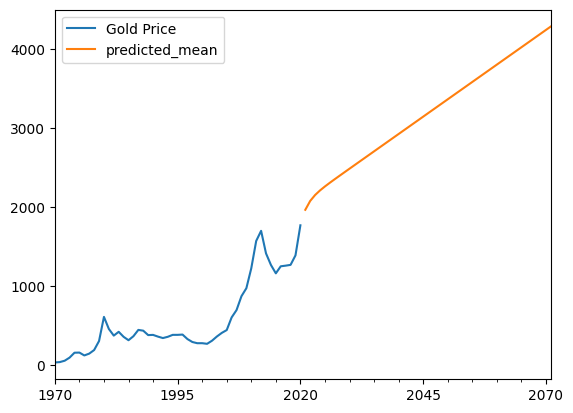

In [351]:
pd.concat([datedf['Gold Price '],forecast1_df],axis=1).plot()